# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [1]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [4]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("/content/Titanic-Dataset.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable:  Target column: Survived

- Feature columns (at least 5):

- 1. Numerical columns:
    - PassengerId, Age, Fare

    - less important: PassengerId

- 2. Categorical Column:
    - Survived, Sex, Pclass, Name, SibSp, Parch, Ticket, Cabin, Embarked

    - less important: Name, Ticket, Cabin

- Is this classification or regression, and why?:

- This Titanic dataset is a binary classification problem because the target feature Survived has only two classes (1 = survived, 0 = not survived).

### Answer: 0.2 Identify Features, Target

- Features can be
  - 1. numerical features

  - 2. categorical features

  - 3. target features


### 1. numerical features

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- Here all feature are numerical
-  [PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare]


- Note:
    - Here are some features that belong to Numerical but actually act as categorical such as

1. Pclass
2. SibSp
3. Parch
4. Survived






### 2. categorical features


In [6]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


- categorical Feature:

- [ Name, Sex, Ticket, Cabin, Embarked ]

In [7]:
# To see the total dataset and nunique() values
print("Total Column: ", df.shape)
df.nunique()

Total Column:  (891, 12)


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


- Here Total Data shape-> 891

- But some of feature values only a range (1-10). this features consider as categorical.
- [Survived, Pclass, SlibSp, Parch]


- so, overall

- Numerical features
  -   [PassengerId, Age,Fare]

- categorical fetures
   - [ Name, Sex, Ticket, Cabin, Embarked,  Survived, Pclass, SlibSp, Parch]


- For this dataset we will find out the Passenger is Survived or not.
- so Survived is Target columns

- Now Label or select the columns

- 1. Numerical columns:
    - PassengerId, Age, Fare

    - less important: PassengerId

- 2. Categorical Column:
    - Survived, Sex, Pclass, Name, SibSp, Parch, Ticket, Cabin, Embarked

    - less important: Name, Ticket, Cabin(

- 3. Target column:
    - Survived

### 3. target features

- [ Survived ]

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [8]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())


Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


### 2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).

- [PassengerId, Name, Ticket, Embarked] can't be any impact our target feature (Survived )

#### Columns to drop and justification
- Columns dropped:  
- Justification (2–3 sentences):

- if a column has 70% missing value then we drop the column

- Cabin column can be drop because the null value Percentage: 77.10%

- Age column can't be drop because then Age column null Percentage: 19.87% which is less then 70%

- Embarked columns Null Values Percentage: 19.87% which is less than 70%, so we can't drop this column

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- Here, Three column contain null values
  - 1. Cabin (High) - drop
  - 2. Age (Mediam) - not drop
  - 3. Embarked(low) - not drop

In [10]:
# - Why Cabin is drop?
# Calculate Missing value Cabin Column

null_value_cabin = df['Cabin'].isnull().sum()/len(df['Cabin']) * 100

print(f"Cabin columns Null Values Percentage: {null_value_cabin:.2f}%")

Cabin columns Null Values Percentage: 77.10%


In [11]:
# - Why not drop the Age column?

null_value_percentag_age = df['Age'].isnull().sum()/len(df['Age']) * 100

print(f"Age columns Null Values Percentage: {null_value_percentag_age:.2f}%")



Age columns Null Values Percentage: 19.87%


In [12]:
# - Why not drop the Embarked column?

null_value_percentag_embarked = df['Embarked'].isnull().sum()/len(df['Embarked']) * 100

print(f"Embarked columns Null Values Percentage: {null_value_percentag_age:.2f}%")



Embarked columns Null Values Percentage: 19.87%


- Cabin columns Null Values Percentage: 77.10% what why we drop this column which is higger missing values.

- Age columns Null Values Percentage: 19.87% what why we not drop this column

- Embarked columns Null Values Percentage: 19.87% what why we not drop this column

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


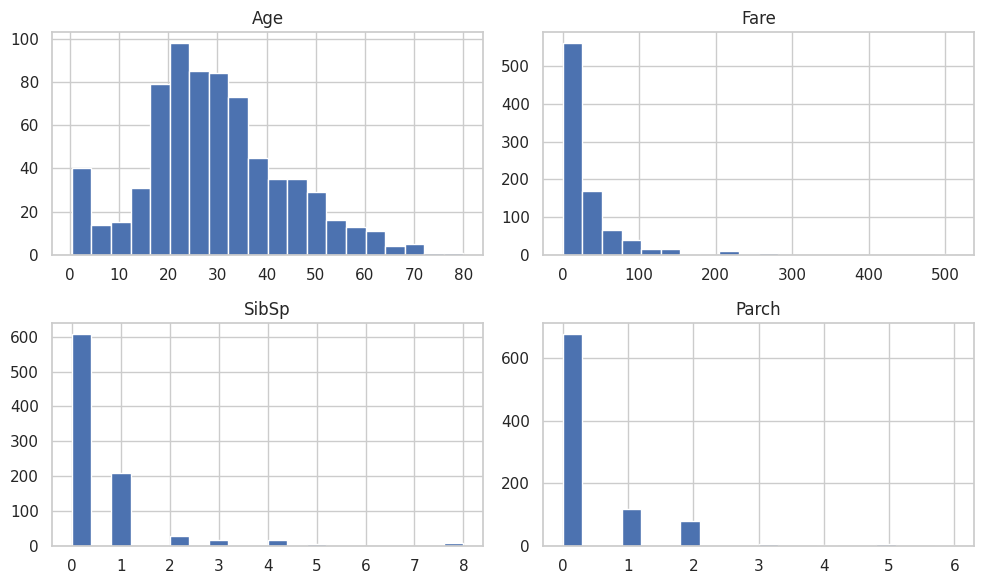

In [13]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()




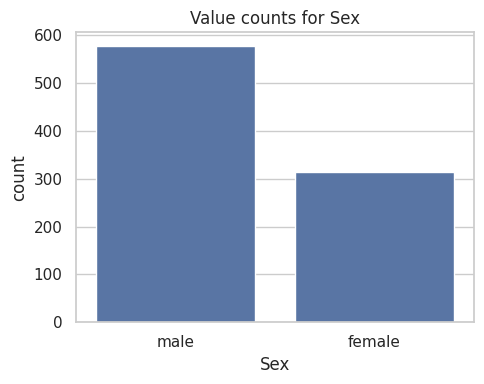

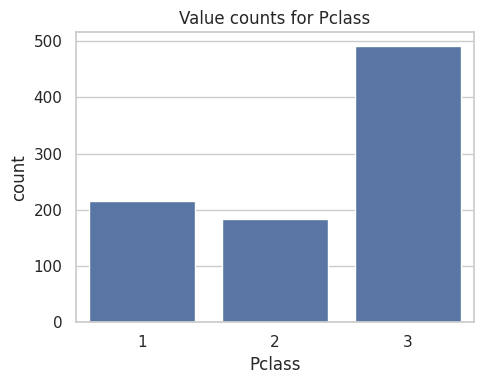

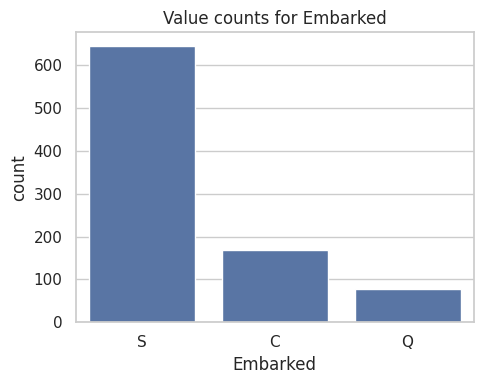

In [14]:
# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_cols:

    plt.figure(figsize = (5,4))

    # df[c].value_counts().plot(kind = 'bar')

    sns.countplot(data=df, x = df[c])


    plt.title(f"Value counts for {c}")

    plt.ylabel("count")

    plt.xticks(rotation = 0) # [Default - 90]

    plt.tight_layout()

    plt.show()


#### Write Your insights

- Insight for Numerical Features
- Insight 1: Skewness
  -  1. Right/Positive Skew features
        - Numerical features: ["Fare", "SibSp", "Parch"]

  -  2. Left/Negative Skew features
        - Numerical features: [No features ]
  
  -  3. Symmetic Skew features
        - Numerical features: [Age(almost) ]

- Insight 2: Outliers Detection  

        - Outliers Numerical features: ["Fare", "SibSp"]
        - NOt Outliers Numerical features: [Age, Parch]

- Insight 3: identify Missing Value
        - No Missing Numerical features: [Age, Parch]
        - Yes Missing Numerical featues: [Fare, SibSp]
        

- Insight for Categorical Features

- Categorical Features
    - sex:
      - numbers of male are higger than female
    - Pclass:
      - Number of 3 Pclass passengers are higger
      - 2nd higger passenger: Pclass 1
      - the lower Pclass Passenger: 2

    - Embarked
      - Most passengers boarded: S
      - 2nd Higger boarded : c
      - low boarded : Q

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


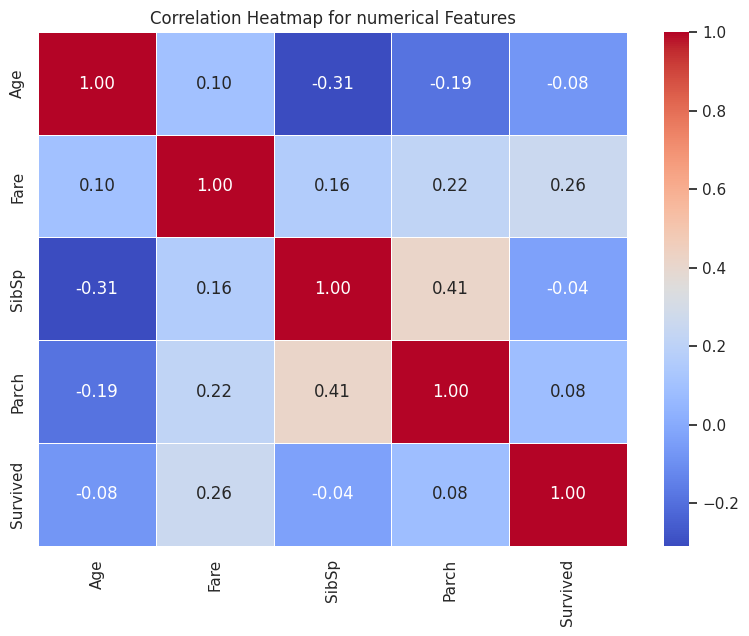

In [15]:
# 3. Bivariate Analysis with Target
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]

# Correlation Matrix and Heatmap for numerical column and target_column

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

corr_matrix = df[numeric_cols + ['Survived']].corr()

plt.figure(figsize = (8,6))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)

plt.title("Correlation Heatmap for numerical Features")

plt.tight_layout()
plt.xticks(rotation = 90) # 90 default

plt.show()

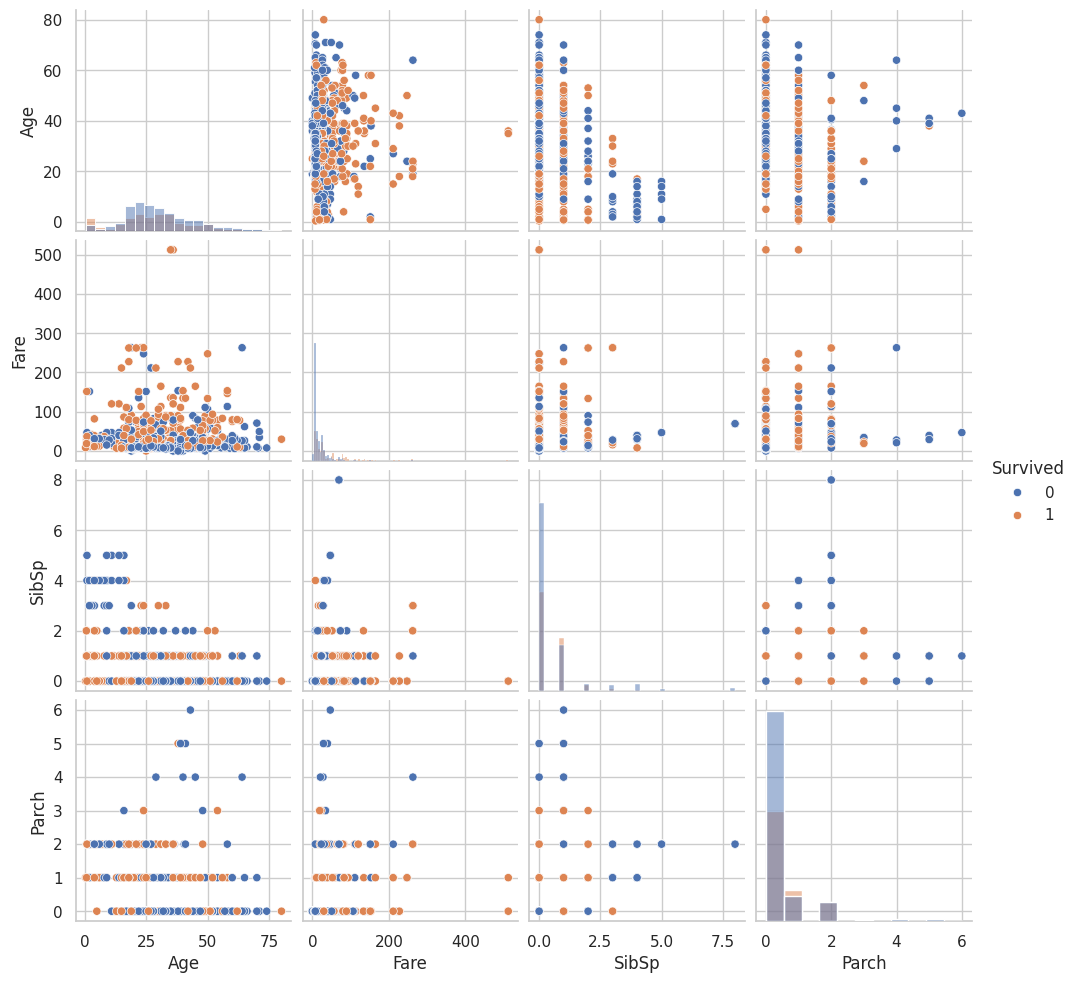

In [16]:
# Create a pairplot for: Age, Fare, SibSp, Parch, and Survived.

# Pairplot for numerical columns (To see the correlation between each features)

sns.pairplot(df[['Age','Fare', 'SibSp', 'Parch', 'Survived']], hue = 'Survived', diag_kind = 'hist')


plt.show()



-

#### Your insights



- Conclusion:

- Numerical feature (Age, Fare) to Target feature (Survived) Correlation:

    - Age to Survived correlation => negative (-0.08)
        - [ younger people had a slightly higher chance of survival than older people]

    - Fare to Survived correlation => positive (0.26)
        - [ Passengers who paid higher fares had a better chance of survival.]

    - SibSp to Survived Correlation => Negative (-0.04)

    - Parch to Survived correlation => Positive (0.08)

    
- For each features individual correlation:

    - Age to SibSp correlatin => Negative (-0.31)
        - [- meaning that as Age increases, the number of siblings/spouses(SibSp) aboard tends to decreases]

    - Parch to SibSp correlatio => Positive(0.41)
        - [- passengers with more parents/children aboard also tend to have more siblings/spouses aboard. ]




- if Age is lower then they are Higger chance to survived










---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


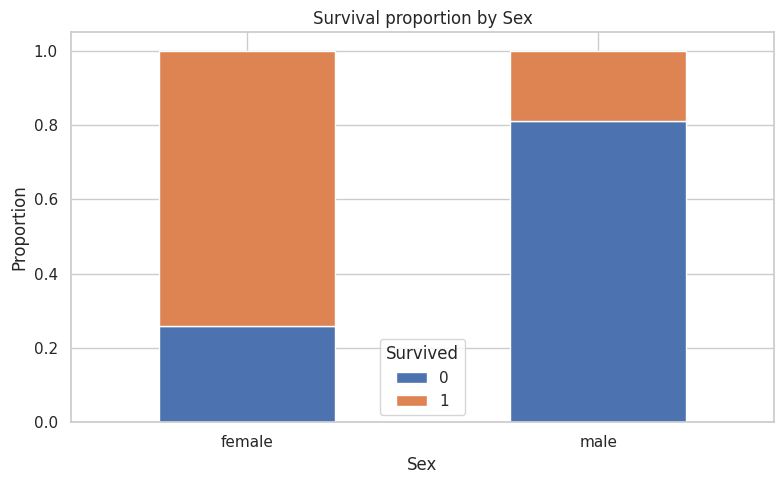


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


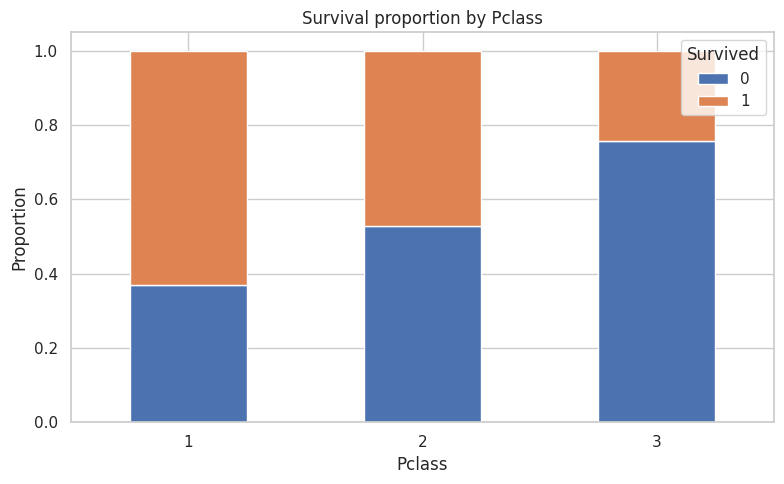


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


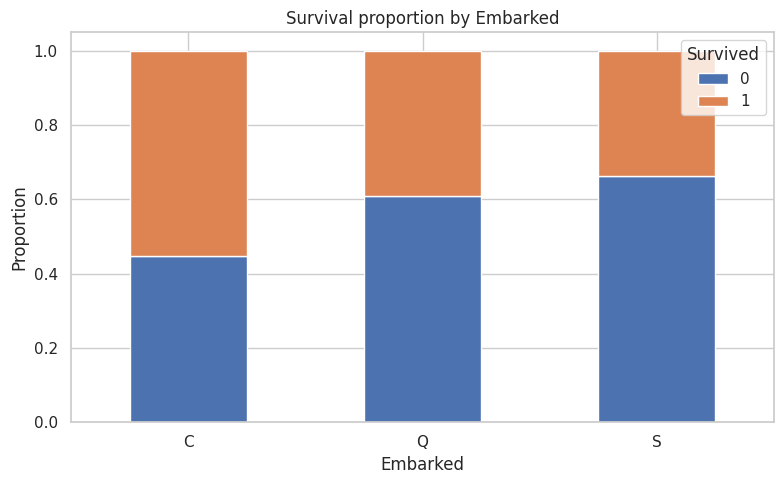

In [17]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


#### Your insights
- Insight 1:  
  - Female(74%) higher chances to survival.
  - Male (81%) lower chances to not survival.


- Insight 2:
  - If a passenger Pclass is 1 then they are 62% to chances survival(Higger chances).

  - if a passenger Pclass is 3 then they are 75% chances to not survival(lower chances to surivive)

  - If a passenger Pclass is 2 then they are 47% to chances survival(mediam change to survive)

- Insight 3:

  - The Passenger who boarded to "C" there Higger chances (55%) to survived.

  - The Passenger who boarded to "S" there Higger chances (66%) to not survived.

  - The Passenger who boarded to "Q" there Higger chances (61%) to not survived.


- overall:
  - higger chances to survival
    - Female, Pclass 1, and Embarked C

  - Lower changes to not Survival
    - Male, Pclass 3, and Embarked S




---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (15 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


In [18]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)

# Fill Age (Complete this code block)

# Fill Embarked (Complete this code block)

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


- Two ways to handle missing value numerical colum

- 1. Handlde case one: drop
    - if a column has 70% missing value then we drop the column

- 2. Handle Missing value case two: fill
    - fill with (median, mean)


- here, Numerical Missing columns: Age

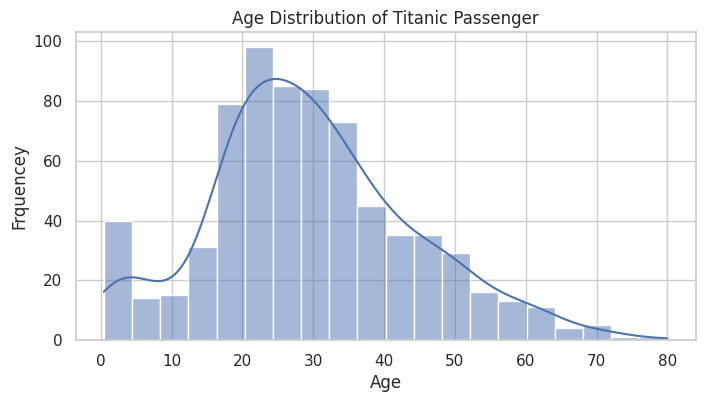

In [20]:
# 1. To handle missing values Age column
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], kde = True, bins = 20)

plt.title("Age Distribution of Titanic Passenger")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()

- conclusion:
  - here, Age column are Right Skewed
  - so, we use median to fill null values for Age column



In [21]:
# Calculate Missing value Age Column

null_value_age = df['Age'].isnull().sum()/len(df['Age']) * 100

print(f"Age columns Null Values Percentage: {null_value_age:.2f}%")

Age columns Null Values Percentage: 19.87%


- The Age column missing values percentager 19.87% which is lower to 70%.

- so, we fill the Age column with median(for right skiwed).

In [32]:
# fill Age column missing value with median
age_median = df["Age"].median()
df["Age"] = df["Age"].fillna(age_median)

- Two ways to handle missing value categorical colum

- 1. Handlde case one: drop
    - if a column has 70% missing value then we drop the column

- 2. Handle Missing value case two: fill
    - fill with : mode

- here, Numerical Missing columns: Cabin, Embarked

Distribution of Embarked Column:


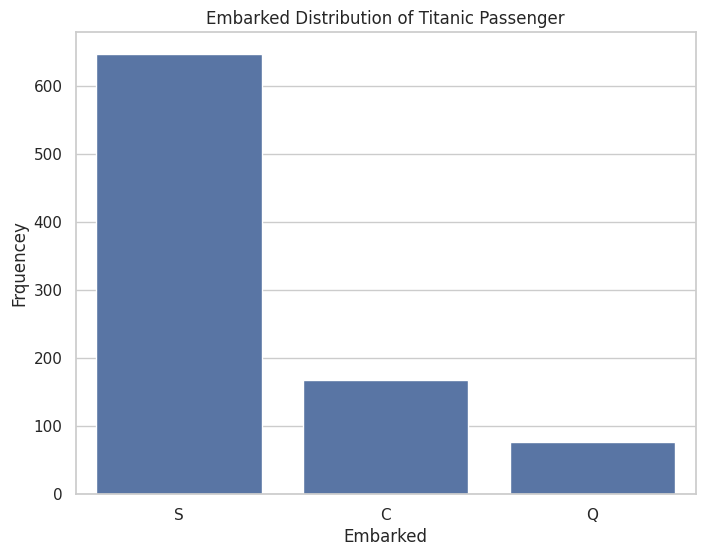

In [29]:
# 2. To handle missing values Embarked column

print("Distribution of Embarked Column:")
plt.figure(figsize=(8,6))

sns.countplot(data=df, x="Embarked")
plt.title("Embarked Distribution of Titanic Passenger")
plt.xlabel("Embarked")
plt.ylabel("Frquencey")
plt.show()


In [33]:
# Calculate Missing value Embarked Column

null_value_embarked = df['Embarked'].isnull().sum()/len(df['Embarked']) * 100

print(f"Embarked columns Null Values Percentage: {null_value_embarked:.2f}%")

Embarked columns Null Values Percentage: 0.00%


- The Embarked column missing values percentager 0.22% which is less than to 70%.

- so, we fill the Embarked column with mode

In [34]:
# Fill Embarked columns missing value with mode

embarked_mode = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(embarked_mode)

Distribution of Cabin Column:


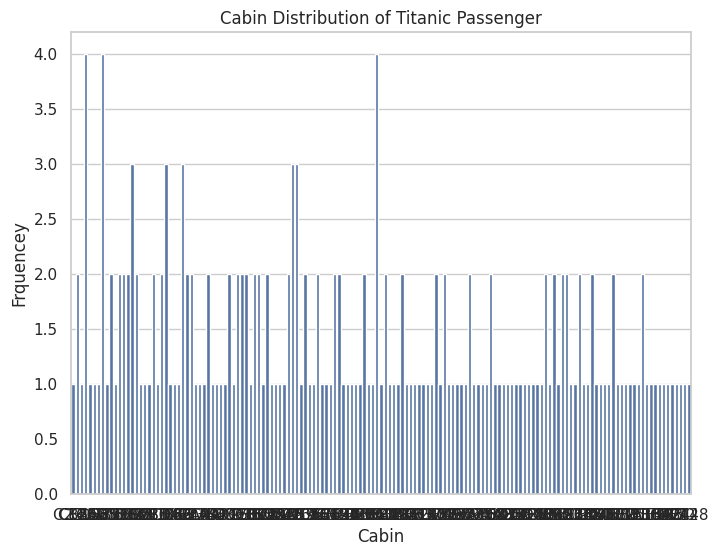

In [35]:
# 3. To handle missing values Cabin column

print("Distribution of Cabin Column:")
plt.figure(figsize=(8,6))

sns.countplot(data=df, x="Cabin")
plt.title("Cabin Distribution of Titanic Passenger")
plt.xlabel("Cabin")
plt.ylabel("Frquencey")
plt.show()


In [36]:
# Calculate Missing value Cabin Column

null_value_cabin = df['Cabin'].isnull().sum()/len(df['Cabin']) * 100

print(f"Cabin columns Null Values Percentage: {null_value_cabin:.2f}%")

# if a column has 70% missing value then we drop the column
# so, Cabin column can be drop

Cabin columns Null Values Percentage: 77.10%


- Conclusion:
  - The number of Missing value of cabin column is 77.10% which greater than 70%.

  - So, we drop this column (above 70% values are missing)

In [37]:
# 3. Drop Cabin (too many missing values)
df = df.drop(columns=["Cabin"])

In [38]:
# after Missing value handling
print("\nMissing values after handling:")
print(df.isna().sum())


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`:

  -  The number of Missing value of cabin column is 77.10% which greater than 70% that why we drop this column.(for Higger missing values)

- Why you used median/mean for `Age`:

  - Age column are Right Skewed. so, we use median to fill null values.


- Why you used mode or another method for `Embarked`:  

  - Embarked is a categorical columns that why we uee mode to fill misssing values.

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [40]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
encoded_df = pd.get_dummies(
    df,
    columns = cat_features,
    dtype=int
)

# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 21)


,Survived,Age,Fare,SibSp,Parch,PassengerId,Survived,Name,Age,SibSp,...,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1,0,"Braund, Mr. Owen Harris",22.0,1,...,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,...,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,7.9250,0,0,3,1,"Heikkinen, Miss. Laina",26.0,0,...,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,1,0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,...,113803,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,8.0500,0,0,5,0,"Allen, Mr. William Henry",35.0,0,...,373450,8.0500,0,1,0,0,1,0,0,1


In [58]:
encoded_df.head(3)
encoded_df.dtypes


,0
PassengerId,int64
Survived,int64
Name,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Sex_female,int64
Sex_male,int64


In [59]:
# drop the Name and Ticket columns
encoded_df = encoded_df.drop(columns=["Name", "Ticket"])
encoded_df.head(3)


,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

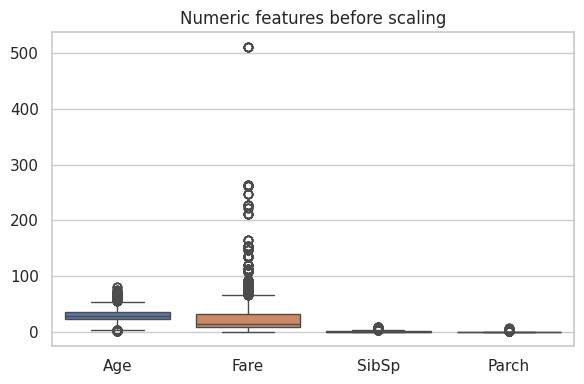

In [45]:
# Boxplot before scaling

score_cols = ["Age", "Fare", "SibSp", "Parch"] # X


plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# scaling code



In [63]:
# split to features and target columns

score_cols = ["Age", "Fare", "SibSp", "Parch"] # X
target_col = "Survived"

X = encoded_df.drop(columns=[target_col])
y = encoded_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [65]:
# Standard Scaling

scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)
X_test_std = scaler_sd.transform(X_test)


In [71]:
print("\n Displaying Standard Scaled Data ")
# Convert scaled arrays back to DataFrame for better visualization with column names

df_scaled = pd.DataFrame(X_train_std, columns = X_train.columns, index = X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_test.columns, index = X_test.index)

print("\nFirst 5 rows of X_train (Standard Scaled):")
display(df_scaled.head())

print("\nFirst 5 rows of X_test (Standard Scaled):")
display(X_test_std_df.head())


 Displaying Standard Scaled Data 

First 5 rows of X_train (Standard Scaled):


,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
298,-0.575735,-0.087648,-0.467660,-0.468878,-0.032568,-0.722247,0.722247,-0.460805,-0.308354,0.595793,1.842481,-0.517254,-1.131311
884,1.696946,-0.318203,-0.467660,-0.468878,-0.487331,-0.722247,0.722247,-0.460805,-0.308354,0.595793,-0.542746,-0.517254,0.883931
247,-0.773529,-0.395055,-0.467660,2.046870,-0.342854,1.384569,-1.384569,-0.460805,-0.308354,0.595793,-0.542746,1.933284,-1.131311
478,0.122358,-0.548758,-0.467660,-0.468878,-0.478201,-0.722247,0.722247,-0.460805,-0.308354,0.595793,-0.542746,-0.517254,0.883931
305,-0.548587,-2.168793,0.376656,2.046870,2.314937,-0.722247,0.722247,-0.460805,-0.308354,0.595793,1.842481,-0.517254,-1.131311



First 5 rows of X_test (Standard Scaled):


,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
709,1.018244,-0.087648,0.376656,0.788996,-0.328391,-0.722247,0.722247,2.170116,-0.308354,-1.678435,-0.542746,-0.517254,0.883931
439,-0.028896,0.142907,-0.467660,-0.468878,-0.420425,-0.722247,0.722247,-0.460805,-0.308354,0.595793,-0.542746,1.933284,-1.131311
840,1.526301,-0.702462,-0.467660,-0.468878,-0.470362,-0.722247,0.722247,-0.460805,-0.308354,0.595793,-0.542746,-0.517254,0.883931
720,1.060906,-1.778386,-0.467660,0.788996,0.015914,1.384569,-1.384569,-0.460805,-0.308354,0.595793,-0.542746,1.933284,-1.131311
39,-1.580214,-1.163572,0.376656,-0.468878,-0.406042,1.384569,-1.384569,2.170116,-0.308354,-1.678435,-0.542746,-0.517254,0.883931


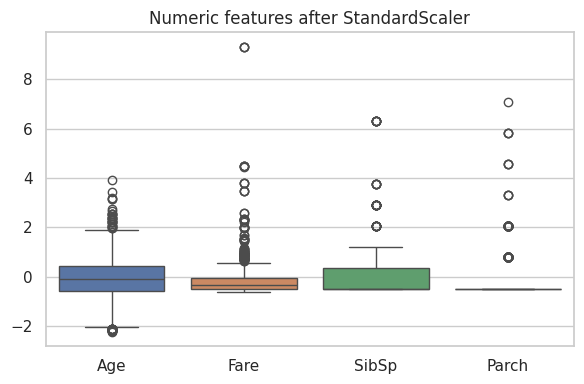

In [69]:
# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1:  
  - Scaling give each feature an equal opportunity to contribute to the learning model.
  
- Sentence 2:
  - After Scaling the outliers can't clear (Fare, SibSp, Parch) columns

  - Before Scaling the outliers are clear for all features

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [72]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 298 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    float64
 1   Age          668 non-null    float64
 2   SibSp        668 non-null    float64
 3   Parch        668 non-null    float64
 4   Fare         668 non-null    float64
 5   Sex_female   668 non-null    float64
 6   Sex_male     668 non-null    float64
 7   Embarked_C   668 non-null    float64
 8   Embarked_Q   668 non-null    float64
 9   Embarked_S   668 non-null    float64
 10  Pclass_1     668 non-null    float64
 11  Pclass_2     668 non-null    float64
 12  Pclass_3     668 non-null    float64
dtypes: float64(13)
memory usage: 73.1 KB
None

Total missing values in final DataFrame: 0


In [77]:
# Central Tendency of data and Disperation of data
df_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,668.0,-8.509494e-17,1.000749,-1.731468,-0.875334,0.019583,0.876687,1.720216
Age,668.0,-1.303016e-16,1.000749,-2.207219,-0.548758,-0.087648,0.450314,3.908643
SibSp,668.0,3.191060e-17,1.000749,-0.467660,-0.467660,-0.467660,0.376656,6.286861
Parch,668.0,-6.382120e-17,1.000749,-0.468878,-0.468878,-0.468878,-0.468878,7.078368
Fare,668.0,-4.520669e-17,1.000749,-0.624051,-0.470362,-0.344793,-0.032568,9.311478
Sex_female,668.0,3.722904e-17,1.000749,-0.722247,-0.722247,-0.722247,1.384569,1.384569
Sex_male,668.0,-3.722904e-17,1.000749,-1.384569,-1.384569,0.722247,0.722247,0.722247
Embarked_C,668.0,-2.127373e-17,1.000749,-0.460805,-0.460805,-0.460805,-0.460805,2.170116
Embarked_Q,668.0,-1.063687e-17,1.000749,-0.308354,-0.308354,-0.308354,-0.308354,3.243030
Embarked_S,668.0,-7.445807e-17,1.000749,-1.678435,-1.678435,0.595793,0.595793,0.595793


In [73]:
# Confirm there are no missing values.
df_scaled.isnull().sum()

,0
PassengerId,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [75]:
# Confirm that all remaining features are numeric and suitable for most ML models
df_scaled.dtypes

,0
PassengerId,float64
Age,float64
SibSp,float64
Parch,float64
Fare,float64
Sex_female,float64
Sex_male,float64
Embarked_C,float64
Embarked_Q,float64
Embarked_S,float64


In [78]:
print("Total Column: ", df_scaled.shape)
df_scaled.nunique()


Total Column:  (668, 13)


,0
PassengerId,668
Age,82
SibSp,7
Parch,7
Fare,211
Sex_female,2
Sex_male,2
Embarked_C,2
Embarked_Q,2
Embarked_S,2


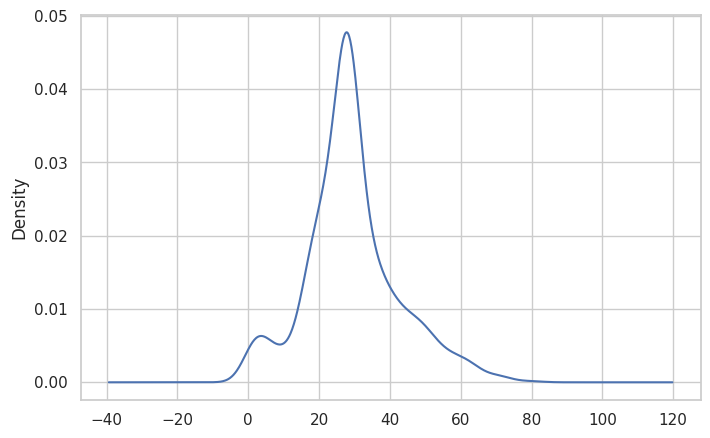

In [79]:
# kde plot

df['Age'].plot(kind = 'kde')

plt.show()

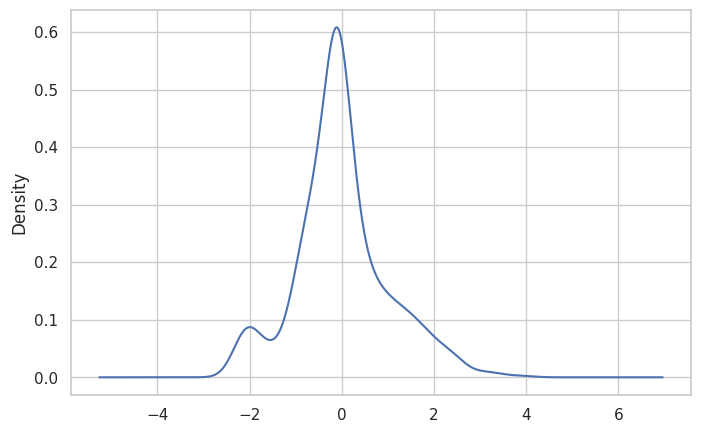

In [80]:
# kde plot

df_scaled['Age'].plot(kind = 'kde')

plt.show()

#### Final remark on dataset readiness
- Your remark:  

- Shape:
  - Before Preprocessing the dataset shape: (891, 12)
  - Before Preprocessing the dataset shape: (668, 13)

- Missing value:
  - Before Preprocessing the dataset contain of Missing value.
  - Before Preprocessing the dataset can't contain of Missing value.


- Overall:

- Perform EDA to Analysis and reporting of Raw data
  - Understanding data distributions, correlations, and patterns.

- Perform Data Prepocessing we clear the unnecessary part of data
such as,
    - Handle Missing Values of each features

- Perform Normalization and scaling
  - give each feature an equal opportunity to contribute to the learning model
    

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.